In [8]:
import shutil
import random
import os
import cv2
import pathlib
import numpy as np
import pandas as pd
import pathlib

import tensorflow as tf
import matplotlib.pyplot as plt
from numpy.random import seed
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
import tensorflow as tf
#from keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.optimizers import SGD


# Set random seed for reproducibility
seed_train_validation = 42
tf.random.set_seed(seed_train_validation)
np.random.seed(seed_train_validation)

In [9]:
# Directory paths
train_data_dir = '/kaggle/input/aml-flowers-dataset/train_images_by_class/train_images_by_class'
val_data_dir = '/kaggle/input/aml-flowers-dataset/validation_images_by_class/validation_images_by_class'
test_data_dir = '/kaggle/input/aml-flowers-dataset/test_images_by_class/test_images_by_class'

# CSV file paths
train_csv_path = '/kaggle/input/aml-flowers-dataset/classes_train.csv'
val_csv_path = '/kaggle/input/aml-flowers-dataset/classes_valid.csv'
test_csv_path = '/kaggle/input/aml-flowers-dataset/classes_test.csv'

train_labels = pd.read_csv(train_csv_path)
val_labels = pd.read_csv(val_csv_path)
test_labels = pd.read_csv(test_csv_path)

# Image size
image_size = (299, 299)

# Batch size
batch_size = 64

In [10]:
# Creazione del generatore di dati
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    brightness_range=[1-0.3, 1+0.3],
    zoom_range=[1-0.2, 1+0.2],
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    directory=train_data_dir,
    target_size=image_size, 
    batch_size=batch_size,  
    class_mode="categorical",  
    shuffle=True,
    seed = 42
)

Found 1020 images belonging to 102 classes.


In [11]:
# Validation and test data generators without data augmentation
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_generator = val_datagen.flow_from_directory(
    directory=val_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    directory=test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

Found 1020 images belonging to 102 classes.
Found 6149 images belonging to 102 classes.


In [12]:
from tensorflow.keras.models import load_model

model = load_model('/kaggle/input/inception-final/inception_final_unfreeze.h5')

97/97 [==============================] - 33s 343ms/step


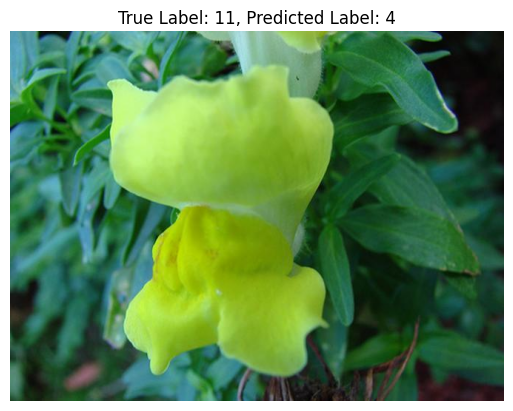

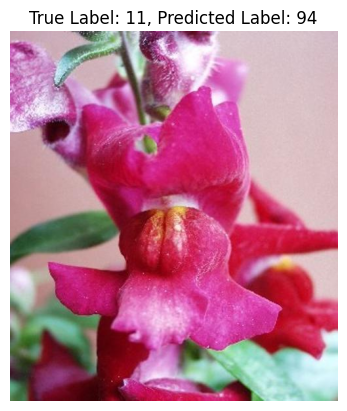

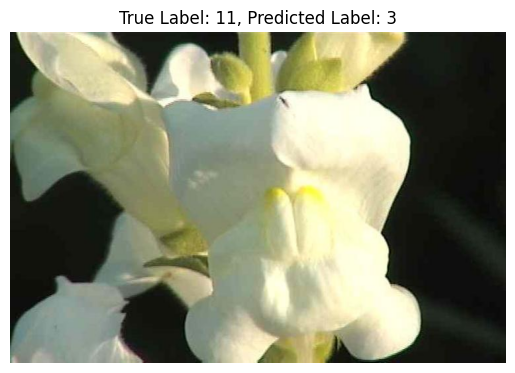

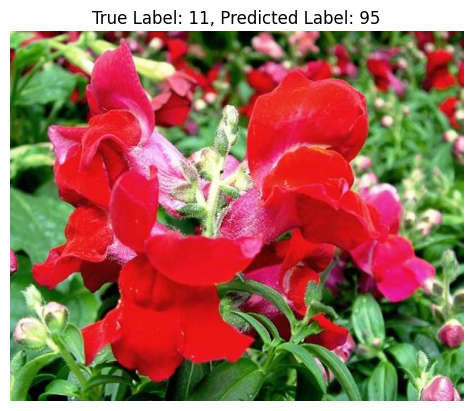

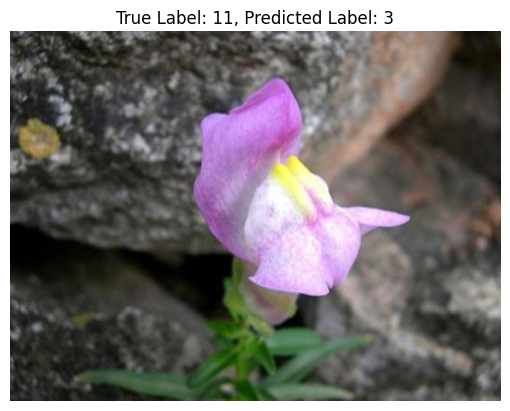

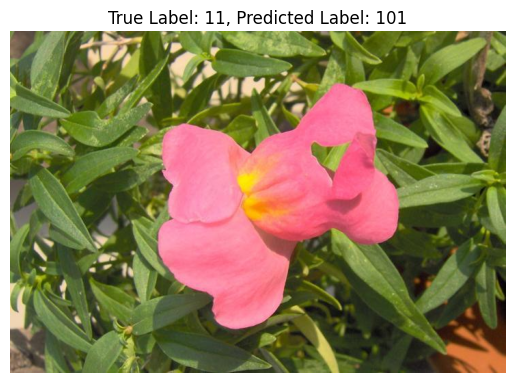

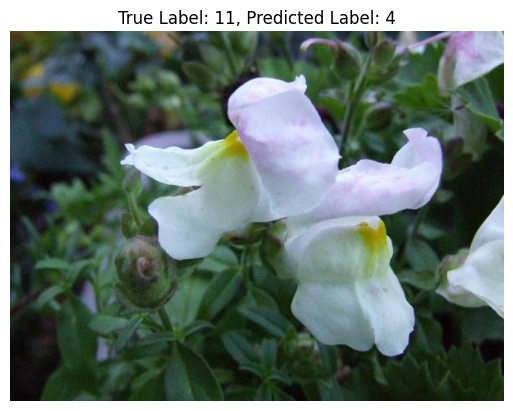

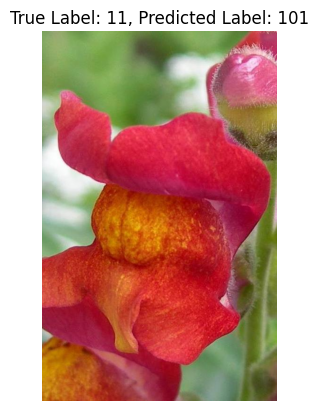

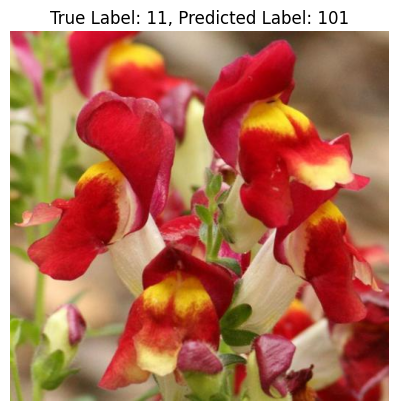

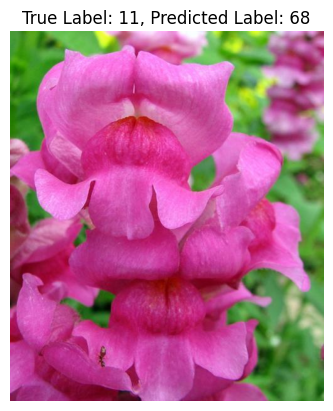

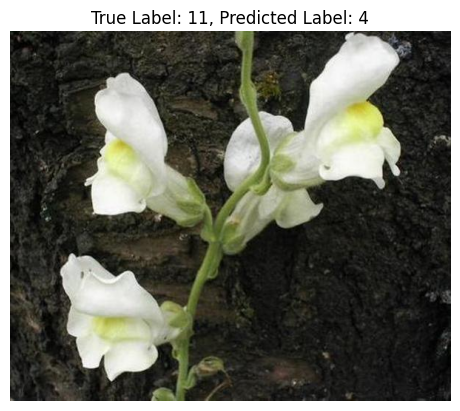

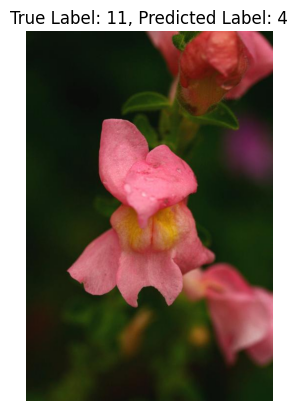

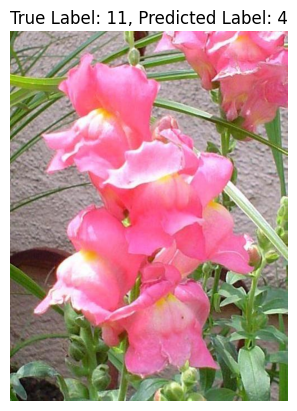

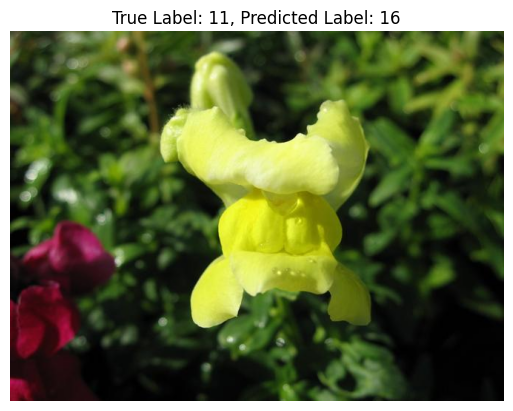

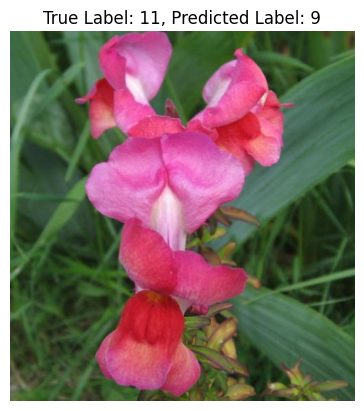

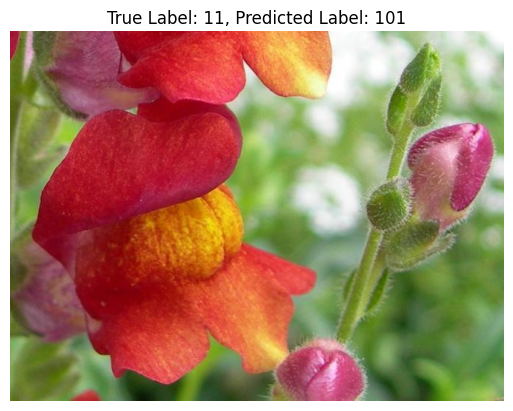

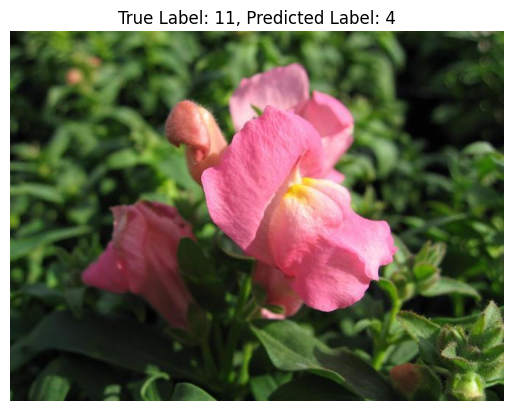

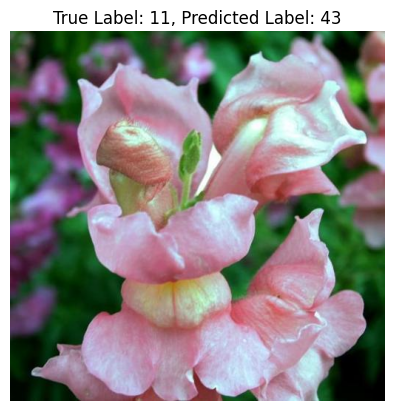

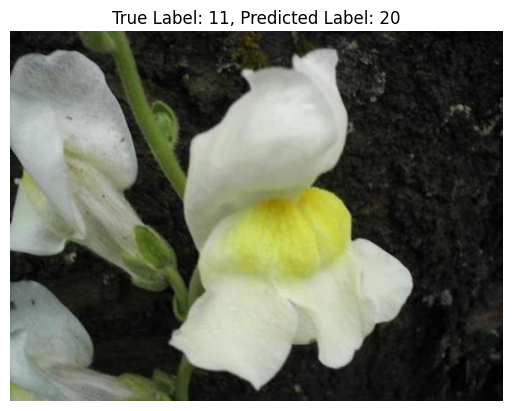

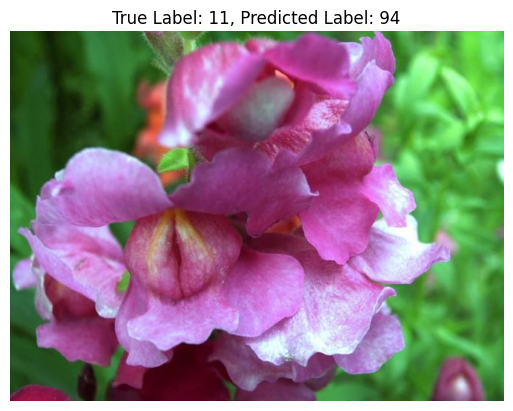

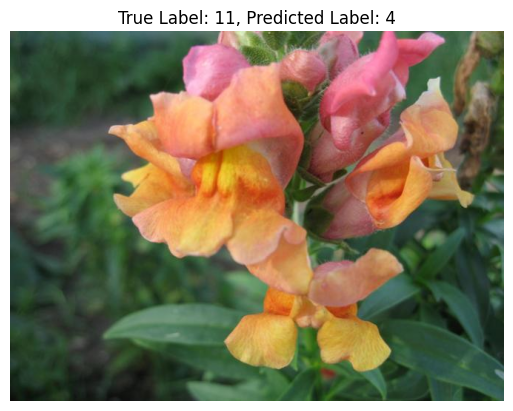

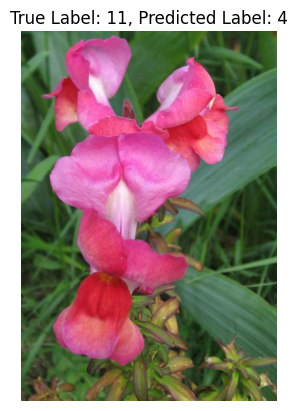

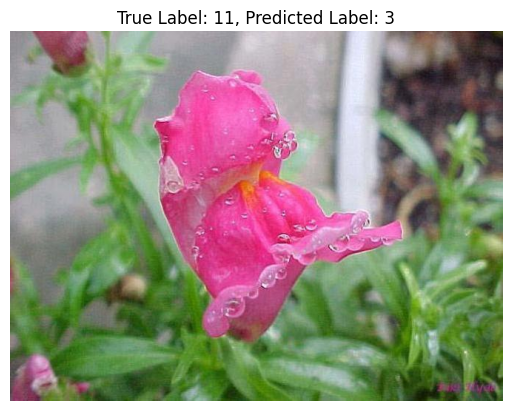

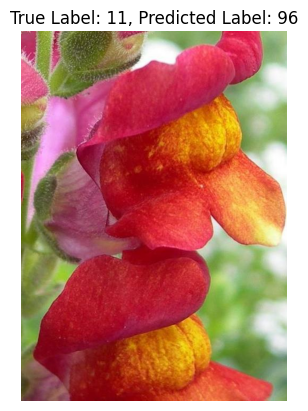

In [15]:
# Predict on the test set
predictions = model.predict(test_generator)

# Get true labels
true_labels = test_generator.classes

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Convert predictions to class labels
predicted_labels = [class_labels[np.argmax(pred)] for pred in predictions]

# Define the class you want to examine misclassifications for
class_to_examine = "11"

# Find misclassifications for the specified class
misclassified_indices = [i for i in range(len(true_labels)) if true_labels[i] != class_labels.index(predicted_labels[i]) and class_labels[true_labels[i]] == class_to_examine]

# Visualize misclassifications for the specified class
for idx in misclassified_indices:
    img_path = test_generator.filepaths[idx]
    true_label = class_labels[true_labels[idx]]
    predicted_label = predicted_labels[idx]
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    plt.axis('off')
    plt.show()


In [14]:
print(class_labels)

['1', '10', '100', '101', '102', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']
